# Real-estate in Russia - analysis of real-estate ads

1. [Examining data](#start)
    * [Summary](#summary_start)   
2. [Data preprocessing](#prep)
    * [Replace nan, typos and different spellings](#replacing)
    * [Adding columns](#add_columns)
    * [Remove outliners](#removing)
    * [Summary](#summary_prep) 
3. [EDA](#eda)
    * [Exploring area, price, number of rooms and height of ceiling](#explore_area_price_rooms_ceiling)
    * [Exploring time of sale](#explore_time)
    * [What factors most affect the cost of an apartment?](#explore_factors_price)
    * [Summary](#summary_eda)
4. [Top-10 localities with a largest number of ads](#top_10_ads)
    * [Summary](#summary_top_10_ads)
5. [Real estate market in Saint Petesburg](#real_estate_spb)
    * [Summary](#summary_real_estate_spb)
6. [Apartments in Saint Petersburg center](#spb_center)
    * [Summary](#summary_spb_center)
7. [Conclusion](#conclusion)


<a id="start"></a>
## Examining data

Let's read the data document in `.csv` format, display the first 5 rows, column names and information about the created dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('real_estate_data.csv', sep ='\t')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [2]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Description of dataframe
* `airports_nearest` — distance to the nearest airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` — ceiling height (m)
* `cityCenters_nearest` — distance to the city center (m)
* `days_exposition` — how many days the ad was placed (from publication to removal)
* `first_day_exposition` — date of publication
* `floor` — floor
* `floors_total` — total floors in the house
* `is_apartment` — apartments (boolean type)
* `kitchen_area` — kitchen area in square meters (m2)
* `last_price` — price at the time of withdrawal from publication
* `living_area` — living area in square meters (m2)
* `locality_name` — name of the locality
* `open_plan` — free layout (boolean type)
* `parks_around3000` — the number of parks within a 3 km radius
* `parks_nearest` — distance to the nearest park (m)
* `ponds_around3000` — number of reservoirs within a radius of 3 km
* `ponds_nearest` — distance to the nearest reservoir (m)
* `rooms` — number of rooms
* `studio' — studio apartment (boolean type)
* `total_area` — the area of the apartment in square meters (m2)
* `total_images` — the number of photos of the apartment in the ad

Now we calculate the proportion of missing values in the columns, and sort them in descending order

In [4]:
df.isna().mean().sort_values(ascending=False)

is_apartment           0.88
parks_nearest          0.66
ponds_nearest          0.62
balcony                0.49
ceiling_height         0.39
airports_nearest       0.23
cityCenters_nearest    0.23
ponds_around3000       0.23
parks_around3000       0.23
days_exposition        0.13
kitchen_area           0.10
living_area            0.08
floors_total           0.00
locality_name          0.00
total_images           0.00
last_price             0.00
studio                 0.00
floor                  0.00
rooms                  0.00
first_day_exposition   0.00
total_area             0.00
open_plan              0.00
dtype: float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


In [6]:
# Check for duplicates
df.duplicated().sum()

0

Let's check column `locality_name` for typos

In [7]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
len(df['locality_name'].unique())

365

<a id="summary_start"></a>
### Summary

Using `.isna()` and `.mean()` we find out which columns are missing values and their proportion of all values.

No duplicate rows were found.

Through `.unique()` we got a list of values in the `'locality_name'` column, it was found that there are typos and different spellings in the dataset.

**Possible causes of missing values and duplicates**:
1. The human factor, since some of the data was entered by users. Perhaps the user who submitted the ad did not consider it necessary to indicate the number of balconies, the footage of the kitchen, etc.
2. The difference in the spelling of names and typos of settlements arose due to the difference in the usage of some letters (in russian we have two different letter е и ё, they're different in pronounciation but very similar in writing. Е is more commonly used)
3. Part of the missing data was obtained automatically based on cartographic data, so the cause may have been incorrect data upload

<a id="prep"></a>
## Data preprocessing

In [9]:
# rename column 'cityCenters_nearest'
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

<a id="replacing"></a>
### Replace nan, typos and different spellings

In [10]:
# drop duplicates in locality_name and fill nan to 'unknown'
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].fillna('unknown')

Observe typos and different spellings in `locality_name` column

In [11]:
print(f'Number of localities is named "Кудрово" -', len(df.query('locality_name == "Кудрово"')))
print(f'Number of localities is named "деревня Кудрово" -', len(df.query('locality_name == "деревня Кудрово"')))

Number of localities is named "Кудрово" - 173
Number of localities is named "деревня Кудрово" - 299


In 2018, the village of Kudrovo became the city of Kudrovo

In [12]:
df['locality_name'] = df['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
print('Number of localities is named "Кудрово" -', len(df.query('locality_name == "Кудрово"')))

Number of localities is named "Кудрово" - 472


The following typos and spellings were also found and fixed

In [13]:
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино', 'Мурино')\
.replace('поселок Коммунар', 'Коммунар')\
.replace('поселок Любань', 'Любань')\
.replace('деревня Федоровское', 'городской поселок Федоровское')\
.replace('деревня Щеглово', 'поселок Щеглово')\
.replace('деревня Калитино', 'поселок Калитино')\
.replace('деревня Зимитцы', 'поселок Зимитцы')\
.replace('поселок Рябово', 'поселок городского типа Рябово')\
.replace('деревня Рабитицы', 'поселок Рабитицы')\
.replace('село Павлово', 'поселок городского типа Павлово')\
.replace('село Никольское', 'Никольское')\
.replace('поселок Громово', 'поселок станции Громово')\
.replace('деревня Гарболово', 'поселок Гарболово')\
.replace('городской поселок', 'поселок городского типа')\
.replace('поселок станции', 'поселок при железнодорожной станции')\

len(df['locality_name'].unique())

319

When prep the dataframe, three situations with columns `'living_area'` and `'kitchen_area'` were identified:
1. Known `'total_area'`, `'living_area'` - nan, `'kitchen_area'` - known -> `'living_area'` ≈ `'total_area'` - `'kitchen_area'` 
2. Known `'total_area'`, `'living_area'` - known, `'kitchen_area'` - nan  -> `'kitchen_area'` ≈ `'total_area'` - `'living_area'`
3. Known `'total_area'`, `'living_area'` - nan, `'kitchen_area'` - nan  -> replacing missing values with the median across groups `'total_area'` and `'rooms'`

In [14]:
mask_living_area = (df['living_area'].isna()) & (df['kitchen_area'] > 0)
mask_kitchen_area = (df['living_area'] > 0) & (df['kitchen_area'].isna())

df.loc[mask_living_area, 'living_area'] = df.loc[mask_living_area].apply(lambda row: (row['total_area'] - row['kitchen_area']), axis=1)
df.loc[mask_kitchen_area, 'kitchen_area'] = df.loc[mask_kitchen_area].apply(lambda row: (row['total_area'] - row['living_area']), axis=1)

The same with `'parks_around3000'` and `'parks_nearest'`, `'ponds_around3000'` and `'ponds_nearest'`: 
1. if `'parks_around3000'` = 0 and `'parks_nearest'` - nan, then replace nan with average `'parks_nearest'` values, that more than 3000 meters
2. if `'ponds_around3000'` = 0 and `'ponds_nearest'` - nan, then replace nan with 3001 (metres), because there is no `'ponds_nearest'` values, that more than 3000 metres.
3. if `'parks_around3000'` or `'ponds_around3000'` > 0 and `'parks_nearest'` or `'ponds_nearest'`- nan, then replace nan with average value in the same column

In [15]:
mask_parks = (df['parks_around3000'] == 0) & (df['parks_nearest'].isna())
value_to_fillna_parks = df[df['parks_nearest'] > 3000]['parks_nearest'].mean()

mask_ponds = (df['ponds_around3000'] == 0) & (df['ponds_nearest'].isna())
value_to_fillna_ponds = 3001

df.loc[mask_parks, 'parks_nearest'] = df.loc[mask_parks, 'parks_nearest'].fillna(value_to_fillna_parks)
df.loc[mask_ponds, 'ponds_nearest'] = df.loc[mask_ponds, 'ponds_nearest'].fillna(value_to_fillna_ponds)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,"3,114.25",0.00,"3,001.00",81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [16]:
mask_parks = (df['parks_around3000'] > 0) & (df['parks_nearest'].isna())
value_to_fillna_parks = df[df['parks_nearest'] <= 3000]['parks_nearest'].mean()

mask_ponds = (df['ponds_around3000'] > 0) & (df['ponds_nearest'].isna())
value_to_fillna_ponds = df['ponds_nearest'].mean()

df.loc[mask_parks, 'parks_nearest'] = df.loc[mask_parks, 'parks_nearest'].fillna(value_to_fillna_parks)
df.loc[mask_ponds, 'ponds_nearest'] = df.loc[mask_ponds, 'ponds_nearest'].fillna(value_to_fillna_ponds)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,"3,114.25",0.00,"3,001.00",81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [17]:
def fillna_with_median(df, columns):
    '''Replace nan-values with median'''
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna(df[col].median()).astype(float)
    return df

def fillna_with_median_by_groups (df, columns_to_group, columns_to_fillna):
    '''Replace nan-values with median by groups'''
    df = df.copy()
    for col in columns_to_fillna:
        groups = df.groupby(columns_to_group)[col].transform('median')
        df[col] = df[col].fillna(groups)
    return df

def fillna_and_convert_to_int(df, columns):
    '''Replace nan-values with 0 and convert to int'''
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna(0).astype(int)
    return df

columns_to_group_1 = ['total_area']
columns_to_fillna_median_by_group_1 = ['living_area', 'kitchen_area', 'ceiling_height'] 

columns_to_group_2 = ['locality_name']
columns_to_fillna_median_by_group_2 = ['city_centers_nearest', 'airports_nearest']
columns_to_prep = ['is_apartment','open_plan','studio']

df = (
    df
    .dropna(subset=['floors_total'])
# replace nan-values in living_area, kitchen_area, ceiling_height with median by area groups
    .pipe(fillna_with_median_by_groups, columns_to_group_1, columns_to_fillna_median_by_group_1)
# replace nan-values in city_centers_nearest и airports_nearest with median by locality groups
    .pipe(fillna_with_median_by_groups, columns_to_group_2, columns_to_fillna_median_by_group_2)
# replace nan-values in  is_apartment, open_plan and studio with 0 and convert into int type
    .pipe(fillna_and_convert_to_int, columns_to_prep)
# remaining nan-values replace with median by whole column
    .pipe(fillna_with_median, columns_to_fillna_median_by_group_1)
)
    
df.isna().sum().sort_values(ascending=False)

balcony                 11480
ponds_nearest            5508
ponds_around3000         5508
parks_nearest            5508
parks_around3000         5508
city_centers_nearest     5432
airports_nearest         5432
days_exposition          3172
last_price                  0
locality_name               0
kitchen_area                0
total_images                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [18]:
# floors_total int
df['floors_total'] = df['floors_total'].astype('int')

<a id="add_columns"></a>
### Adding columns

In [19]:
def create_floor_group(df):
    '''Create new column with categories by number of floors: 1 - first, 3 - last, 2 - other'''
    if df['floor'] == 1:
        return 1
    elif df['floor'] == df['floors_total']:
        return 3
    else:
        return 2

def prep_of_columns(df):
    '''Converting columns with date and add new'''
    return df.assign(
#         price of square meter
        price_per_area = lambda x: x['last_price'] / x['total_area'],
#         number of week, month and year of ad publication
        first_day_exposition = lambda x: pd.to_datetime(x['first_day_exposition'],format = '%Y%m%dT%H:%M:%S'),
        first_exposition_month = lambda x: x['first_day_exposition'].dt.month,
        first_exposition_day_of_week = lambda x: x['first_day_exposition'].dt.dayofweek,
        first_exposition_year = lambda x: x['first_day_exposition'].dt.year,
#         categorie of floor (first, last, other)
        floor_group = lambda x: x.apply(create_floor_group, axis = 1),
#         ratio of living and total area
        living_area_share = lambda x: x['living_area'] / x['total_area'],
#         ratio of kitchen and total area
        kitchen_area_share = lambda x: x['kitchen_area'] / x['total_area'],
    )

df = (
    df
    .pipe(prep_of_columns)
)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_area',
       'first_exposition_month', 'first_exposition_day_of_week',
       'first_exposition_year', 'floor_group', 'living_area_share',
       'kitchen_area_share'],
      dtype='object')

In [20]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,first_exposition_month,first_exposition_day_of_week,first_exposition_year,floor_group,living_area_share,kitchen_area_share
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,0,...,2.00,755.00,NaN,"120,370.37",3,3,2019,2,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11,18.60,1,0,...,0.00,"3,001.00",81.00,"82,920.79",12,1,2018,1,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.60,5,34.30,4,0,...,2.00,574.00,558.00,"92,785.71",8,3,2015,2,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,3.14,14,95.00,9,0,...,3.00,234.00,424.00,"408,176.10",7,4,2015,2,0.60,0.09
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,0,...,1.00,48.00,121.00,"100,000.00",6,1,2018,2,0.32,0.41


* `price_per_area` — price of square meter
* `first_exposition_month` — number of month of ad publication
* `first_exposition_day_of_week` — number of day in week of ad publication
* `first_exposition_year` — year of ad publication
* `floor_group` — categorie of number of floor (first, last, other)
* `living_area_share` — ratio of living and total area
* `kitchen_area_share` — ratio of kitchen and total area

<a id="removing"></a>
### Remove outliners

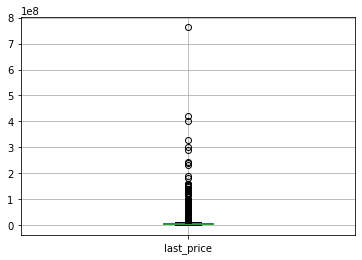

In [21]:
df.boxplot('last_price')
plt.show()

Выбиваются отдельные значения со стоимостью свыше 200 млн. Удалим строки со значениями свыше 200 млн

In [22]:
df = df[(df['last_price'] <= 2*10**8)]

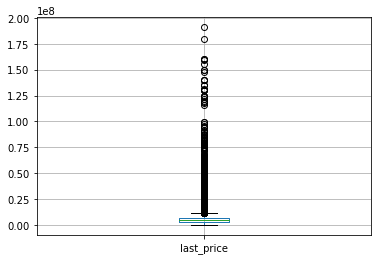

In [23]:
df.boxplot('last_price')
plt.show()

Виден разрыв значений. Было решено отбросить те значения, которые больше 35 млн

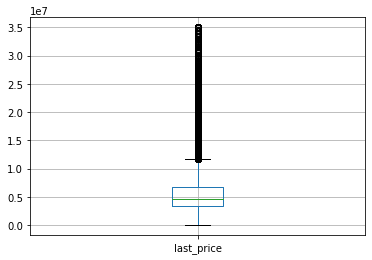

In [24]:
df = df[(df['last_price'] <= 3.5*10**7)]
df.boxplot('last_price')
plt.show()

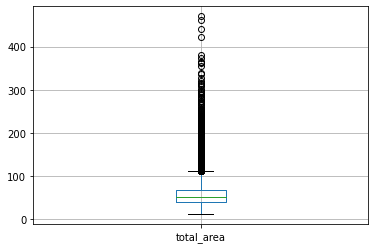

In [25]:
# рассмотрим total_area
df.boxplot('total_area')
plt.show()

По графику видно большое количество точек-выбросов, но видно два "разрыва" между ними. Было принято решение отбросить те выбросы, которые больше 270

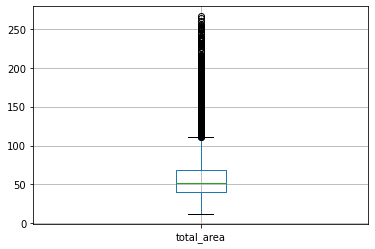

In [26]:
df = df[(df['total_area'] < 270)]
df.boxplot('total_area')
plt.show()

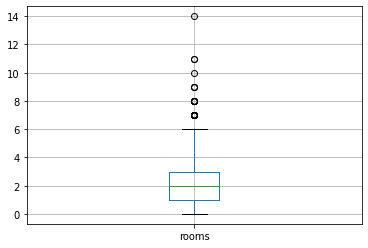

In [27]:
# рассмотрим total_area
df.boxplot('rooms')
plt.show()

Также много выбросов по графику, отбросим все строки, в которых комнат больше 7

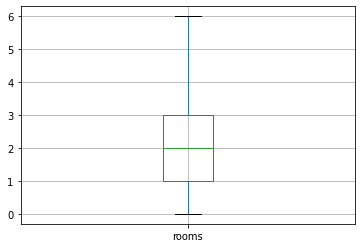

In [28]:
df = df[(df['rooms'] < 7)]
df.boxplot('rooms')
plt.show()

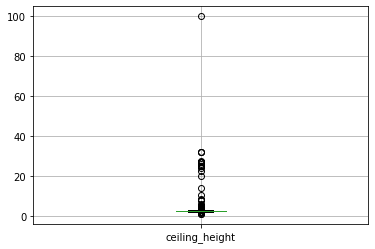

In [29]:
# рассмотрим ceiling_height
df.boxplot('ceiling_height')
plt.show()

Здесь видны выбросы в обе стороны. Очень выделяется значение в 100 м. Оставим те строки, в которых высота потолков ниже 19 м.

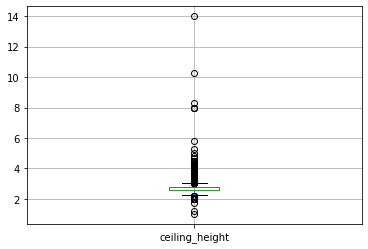

In [30]:
df = df[(df['ceiling_height'] < 19)]
df.boxplot('ceiling_height')
plt.show()

Также осталось много выбросов, поэтому было решено оставить строки с высотой потолков от 2 до 3,5 метров

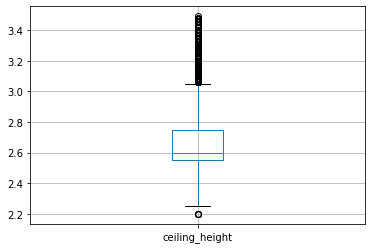

In [31]:
df = df.query('2 < ceiling_height < 3.5')
df.boxplot('ceiling_height')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22871 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  22871 non-null  int64         
 1   last_price                    22871 non-null  float64       
 2   total_area                    22871 non-null  float64       
 3   first_day_exposition          22871 non-null  datetime64[ns]
 4   rooms                         22871 non-null  int64         
 5   ceiling_height                22871 non-null  float64       
 6   floors_total                  22871 non-null  int32         
 7   living_area                   22871 non-null  float64       
 8   floor                         22871 non-null  int64         
 9   is_apartment                  22871 non-null  int32         
 10  studio                        22871 non-null  int32         
 11  open_plan                   

<a id="summary_prep"></a>
### Summary

The data was processed for further work: missing values ​​were replaced, duplicates were removed, data types were changed to suitable ones

* In the columns `'is_apartment'`, ``open_plan'`, ``studio'`, the missing values were replaced with 0, since if the apartment met the relevant conditions, the owner would indicate this

* In the columns `'living_area'`, `'kitchen_area'`, `'ceiling_height'`, `'balcony'`, the missing values were replaced with medians for groups by `'total_area'`

* It was decided to replace the remaining NaNs with the median values for the column

* In `'parks_nearest'`, `'ponds_nearest'`, `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`, `'ponds_around3000'` it was decided to leave the NaN part, as they affect further calculations related directly to the apartment parameters, and if necessary, can be deleted. Some missing values have been replaced with "logical" conditions, such as the replacements for `'parks_nearest'` and `'parks_around3000'`.

* Gaps in `'city_centers_nearest'` and `'airports_nearest'` have been replaced with the median values of those strings that matched `'locality_name'`

* In the `'floors_total'` column, due to the small number (86), the rows that are equal to NaN have been removed

* Column `'cityCenters_nearest'` renamed to `'city_centers_nearest'`

* Values in `'first_day_exposition'` have been cast to `datetime` data type

* Replaced missing values in `'locality_name'` column with `"unknown"`

* Removed implicit duplicates in `'locality_name'`

* Changed data types in columns `'days_exposition'`, `'floors_total'`

Our functions:
* categorized floors and created separate column `'floor_group'`

* with the help of `.assign()` and `.pipe()` auxiliary columns were successively added for further work.

* In the `'first_day_exposition'` column, the data type was changed to `datetime`, after which, through special methods for working with `datetime(dt)`, separate columns were created for solving further problems

Были удалены "сверх" выбросы по столбцам `'last_price'`, `'total_area'`, `'rooms'` и `'ceiling_height'` с помощью графика "ящик с усами" (`.boxplot()`)

Через первое построение графика выбивался один "сверх" выброс в каждой колонке, который соответствовал максимальному значению, полученному методом `.describe()`

<a id="eda"></a>
## EDA

<a id="explore_area_price_rooms_ceiling"></a>
### Exploring area, price, number of rooms and height of ceiling

In [33]:
columns_to_desribe = ['total_area', 'last_price', 'rooms', 'ceiling_height']
df[columns_to_desribe].describe()

,total_area,last_price,rooms,ceiling_height
count,"22,871.00","22,871.00","22,871.00","22,871.00"
mean,57.30,"5,660,735.49",2.01,2.67
std,25.77,"4,032,329.68",0.97,0.18
min,12.00,"12,190.00",0.00,2.20
25%,40.00,"3,400,000.00",1.00,2.55
50%,51.00,"4,550,000.00",2.00,2.60
75%,67.70,"6,500,000.00",3.00,2.75
max,266.20,"35,000,000.00",6.00,3.49


In [34]:
df[df['rooms'] == 19]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,first_exposition_month,first_exposition_day_of_week,first_exposition_year,floor_group,living_area_share,kitchen_area_share


In [35]:
df[df['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,first_exposition_month,first_exposition_day_of_week,first_exposition_year,floor_group,living_area_share,kitchen_area_share


In [36]:
df[df['total_area'] == 12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,first_exposition_month,first_exposition_day_of_week,first_exposition_year,floor_group,living_area_share,kitchen_area_share
19904,4,"2,400,000.00",12.00,2017-07-19,1,2.55,5,10.00,2,0,...,2.00,45.00,200.00,"200,000.00",7,2,2017,2,0.83,0.17


<a id="eda_hist"></a>
### Histograms

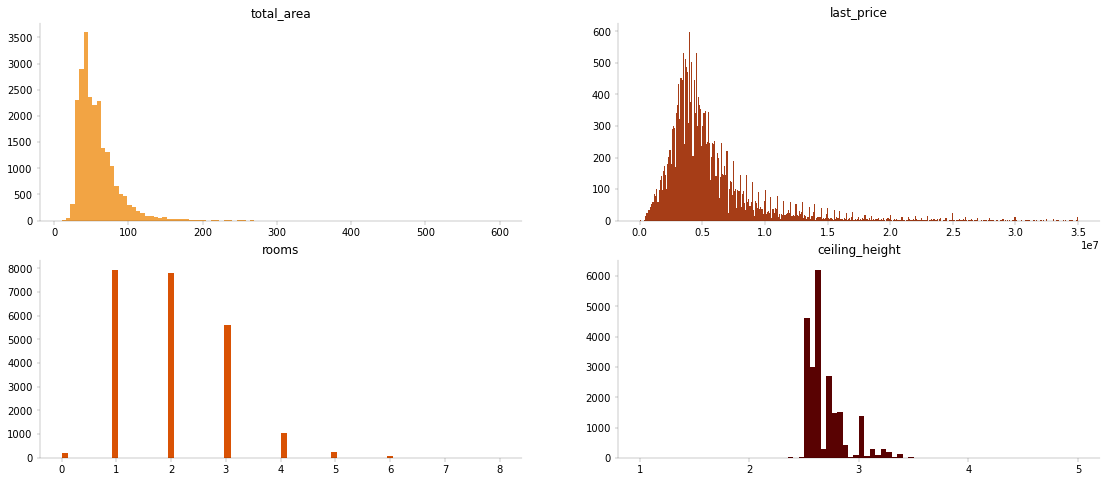

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(19,8))
for x in range(2):
    for y in range(2):
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.2)
        ax[x][y].yaxis.set_tick_params(width=0.2)
        for axis in ['top','bottom','left','right']:
            ax[x][y].spines[axis].set_linewidth(0.2)

ax[0][0].hist(df.total_area, bins=100, range=(10,600), color='#F2A444')
ax[0][0].set_title('total_area')

ax[0][1].hist(df.last_price, bins=400, color='#A63D17')
ax[0][1].set_title('last_price')

ax[1][0].hist(df.rooms, bins=70, range=(0,8), color='#D95204') 
ax[1][0].set_title('rooms')

ax[1][1].hist(df.ceiling_height, bins=80, range=(1,5), color='#590202') 
ax[1][1].set_title('ceiling_height')

plt.show()

The graphs show outliers, and it is also clear that without taking them into account, the distribution tends to normal.

The largest outliers on the chart among house prices.

<a id="explore_time"></a>
### Exploring time of sale
Let's study the time of selling an apartment: plot a histogram, calculate the average and median.

Let's describe how much a sale usually takes.

When can sales be considered very fast, and when unusually long?

In [38]:
# calcute right number of bins
def freedman_diaconis(data, returnas="width"):
    from scipy import stats
    import numpy as np
    data = np.asarray(data, dtype=np.float_)
    IQR = stats.iqr(data, rng=(25, 75), scale=1.0, nan_policy="omit")
    N = data.size
    bw = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

NBR_BINS = freedman_diaconis(df['days_exposition'].dropna(), returnas="bins")

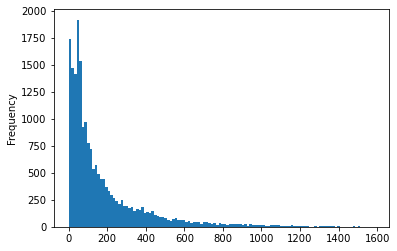

In [39]:
df['days_exposition'].plot(kind='hist', bins=NBR_BINS)
plt.show()

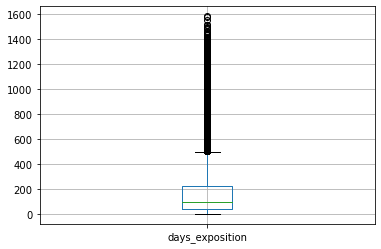

In [40]:
df.boxplot('days_exposition')
plt.show()

In [41]:
print(f'Median exposition before remove ads: {df["days_exposition"].median():.0f}')
print(f'Average exposition before remove ads: {df["days_exposition"].mean():.0f}')
print(f'Standard deviation: {df["days_exposition"].std():.1f}')

Median exposition before remove ads: 94
Average exposition before remove ads: 178
Standard deviation: 217.5


According to the graphs, as well as the difference between the median and the arithmetic mean (average) and the high standard deviation, it can be seen that there are outliers in the number of days the apartment was sold.

Three values of the variable are also highlighted on the graph, for this number of days apartments are most often sold. Let's consider them in more detail

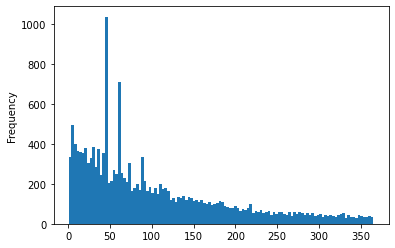

In [42]:
df['days_exposition'].plot(kind='hist', bins=NBR_BINS, range=(1, 365))
plt.show()

These three values are within 100 days. It is noticeable that the graph does not have a normal distribution.

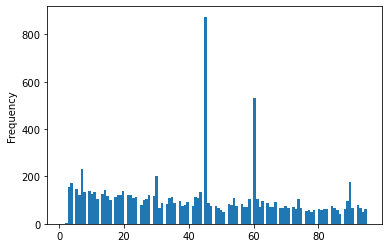

In [43]:
df['days_exposition'].plot(kind='hist', bins=NBR_BINS, range=(1, 95))
plt.show()

In this case, the best measure of the mean is the median, which is also the mode. That is, it usually takes 95 days to sell an apartment.

*When can sales be considered very fast, and when unusually long?*

In [44]:
df['days_exposition'].describe()

count   19,879.00
mean       178.50
std        217.47
min          1.00
25%         45.00
50%         94.00
75%        227.00
max      1,580.00
Name: days_exposition, dtype: float64

There were sales made in one day, as well as those that lasted more than four years. Output rows with these indicators

In [45]:
df.query('days_exposition == 1 or days_exposition == 1580')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,first_exposition_month,first_exposition_day_of_week,first_exposition_year,floor_group,living_area_share,kitchen_area_share
1632,19,"4,000,000.00",49.90,2019-05-01,2,2.50,9,25.00,1,0,...,1.00,681.00,1.00,"80,160.32",5,2,2019,1,0.50,0.20
18843,11,"3,500,000.00",48.20,2014-12-15,2,2.50,5,27.40,2,0,...,NaN,NaN,"1,580.00","72,614.11",12,0,2014,2,0.57,0.16


We decided to remove these two rows

In [46]:
df = df[(df['days_exposition'] != 1) & (df['days_exposition'] != 1580)]

<a id="explore_factors_price"></a>
###  What factors most affect the cost of an apartment?

                      last_price  total_area  rooms  floor_group  \
last_price                  1.00        0.78   0.49         0.05   
total_area                  0.78        1.00   0.78         0.04   
rooms                       0.49        0.78   1.00         0.01   
floor_group                 0.05        0.04   0.01         1.00   
city_centers_nearest       -0.33       -0.20  -0.14        -0.02   

                      city_centers_nearest  
last_price                           -0.33  
total_area                           -0.20  
rooms                                -0.14  
floor_group                          -0.02  
city_centers_nearest                  1.00  


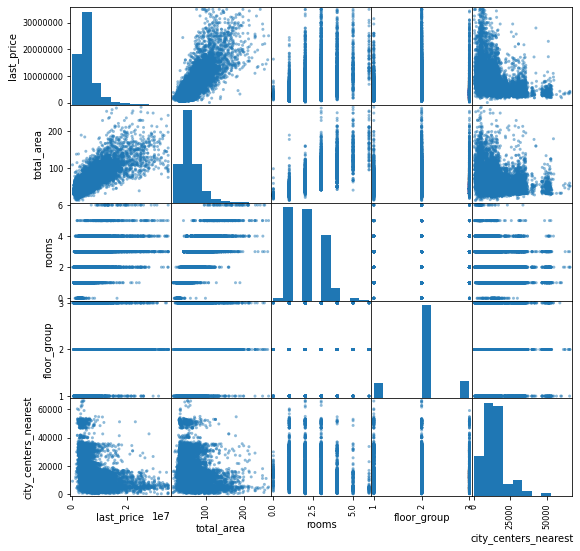

In [47]:
df_stat_multi = df[['last_price', 'total_area',  'rooms', 'floor_group', 'city_centers_nearest']]
print(df_stat_multi.corr())
pd.plotting.scatter_matrix(df_stat_multi, figsize=(9,9))
plt.show()

The correlation between `total_area` and `last_price` is high - `0.78`. The correlation is also visible on the graph

Between `rooms` and `last_price` - `0.49` there is a moderate correlation

The Pearson coefficient for the columns `city_centers_nearest` and `last_price` is equal to `0.33`, which also indicates the presence of a low correlation.

                              last_price  first_exposition_month  \
last_price                          1.00                    0.00   
first_exposition_month              0.00                    1.00   
first_exposition_day_of_week       -0.02                    0.01   
first_exposition_year              -0.03                   -0.27   

                              first_exposition_day_of_week  \
last_price                                           -0.02   
first_exposition_month                                0.01   
first_exposition_day_of_week                          1.00   
first_exposition_year                                -0.00   

                              first_exposition_year  
last_price                                    -0.03  
first_exposition_month                        -0.27  
first_exposition_day_of_week                  -0.00  
first_exposition_year                          1.00  


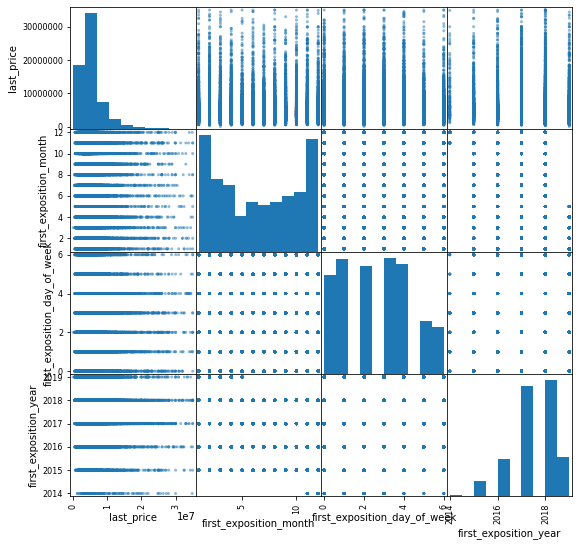

In [48]:
df_stat_multi_date = df[['last_price', 'first_exposition_month', 'first_exposition_day_of_week', 'first_exposition_year']]
print(df_stat_multi_date.corr())
pd.plotting.scatter_matrix(df_stat_multi_date, figsize=(9,9))
plt.show()

According to the graph and the values of the correlation coefficients, it is clear that the correlation is very low

<a id="summary_eda"></a>
### Summary
* The histograms show outliers, and it is also clear that without taking them into account, the distribution tends to normal.
* The largest outliers on the chart among house prices.
* The time to sell an apartment was observed: average mean = 169 and median = 95 days.
* Also, using the graph, it was determined that, on average, an apartment is sold in 95 days
* Rows were removed where the apartment was sold in 1 day and in more than 4 years
* What factors most affect the cost of an apartment?
    1. total living area
    2. number of rooms
    3. distance from the center

<a id="top_10_ads"></a>
## Top-10 localities with a largest number of ads

In [49]:
top_ad_location_list = df['locality_name'].value_counts().iloc[:10].index.to_list()

df_top_ad = df.query('locality_name in @top_ad_location_list')

pivot_table_ads = df_top_ad.pivot_table(index='locality_name', values='price_per_area',aggfunc={'price_per_area': 'mean',
                             'locality_name': 'count'}).sort_values('price_per_area', ascending=False)
pivot_table_ads.columns = ['number_of_ads', 'mean_price_per_area']
print('Top-10 localities by number of ads on real estate website')
display(pivot_table_ads)

print(f'Average price per square meter in 10 localities with the largest number of ads: {df_top_ad["price_per_area"].mean():.1f}')

Top-10 localities by number of ads on real estate website


,number_of_ads,mean_price_per_area
locality_name,,
Санкт-Петербург,14977,"110,636.44"
Пушкин,357,"102,557.35"
Кудрово,469,"95,261.96"
поселок Парголово,326,"90,332.26"
Мурино,584,"86,018.11"
поселок Шушары,438,"78,528.74"
Колпино,337,"75,333.30"
Гатчина,305,"68,811.37"
Всеволожск,394,"68,608.88"


Average price per square meter in 10 localities with the largest number of ads: 105296.9


In [50]:
df_top_ad_pivot = df_top_ad.pivot_table(index='locality_name', values='last_price', aggfunc=['max', 'min'])
df_top_ad_pivot.columns = ['_'.join(col).strip() for col in df_top_ad_pivot.columns.values]

print('The most expensive apartment')
display(df_top_ad_pivot[df_top_ad_pivot['max_last_price'] == df_top_ad_pivot['max_last_price'].max()]['max_last_price'])
print('The cheapest apartment')
display(df_top_ad_pivot[df_top_ad_pivot['min_last_price'] == df_top_ad_pivot['min_last_price'].min()]['min_last_price'])

The most expensive apartment


locality_name
Санкт-Петербург   35,000,000.00
Name: max_last_price, dtype: float64

The cheapest apartment


locality_name
Санкт-Петербург   12,190.00
Name: min_last_price, dtype: float64

<a id="summary_top_10_ads"></a>
### Summary
The 10 localities with the largest number of ads are shown in the table.

Average price per square meter in all localities - **105,368** , for each individual locality, it is presented in the table

In **Saint Petersburg**, the highest and lowest final cost of housing sales were found at the same time. If we consider the cost of housing at the average cost per square meter, then:
1. The most expensive housing in **St. Petersburg**
2. The cheapest housing in **Vyborg**

<a id="real_estate_spb"></a>
## Real estate market in Saint Petesburg

Let's study the offers of apartments: for each apartment there is information about the distance to the center. We will allocate apartments in St. Petersburg. 

The task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: rounded up to integer values. After that, we will calculate the average price for each kilometer. 

Let's build a graph: it should show how the price depends on the distance from the center. 

Let's define the boundary where the graph changes a lot — this will be the central zo

In [51]:
def add_column(df):
    '''Create column with kilometers to city center'''
    return df.assign(
        city_center_km = lambda x: round(x['city_centers_nearest'] / 1000))

df_spb = (
    df
    .loc[df['locality_name'] == 'Санкт-Петербург']
    .pipe(add_column)
)

df_spb_price_center = df_spb.groupby('city_center_km')['last_price'].median().reset_index()

df_spb_price_center.columns = ['km_from_city_center', 'mean_last_price']
df_spb_price_center.head()

,km_from_city_center,mean_last_price
0,0.00,"11,545,000.00"
1,1.00,"9,500,000.00"
2,2.00,"9,200,000.00"
3,3.00,"8,120,000.00"
4,4.00,"8,565,000.00"


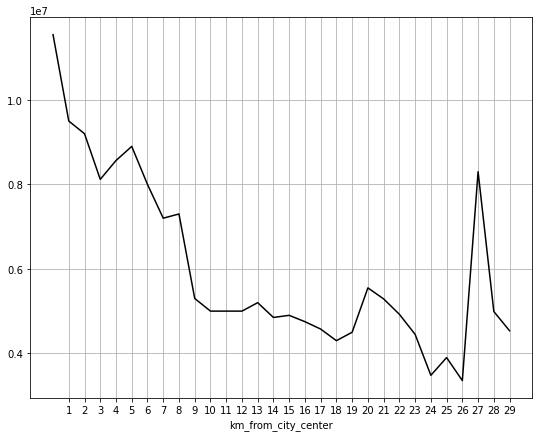

In [52]:
# построим график зависимости цены от удалённости от центра.
df_spb_price_center.plot(x='km_from_city_center', y='mean_last_price', grid=True, figsize=(9,7), color='black', legend=False)
plt.xticks(range(1,30))
plt.show()

<a id="summary_real_estate_spb"></a>
### Summary
The central zone will be the distance ** to 9 km **, as the graph shows a sharp drop in price. The average cost of an apartment 27 km from the city center is also highlighted - since this is the only outlier, we do not take it into account

<a id="spb_center"></a>
## Apartments in Saint Petersburg center
Let's select a segment of apartments in the center (less than or equal to 8 km). Let's analyze this territory and study the following parameters: area, price, number of rooms, ceiling height.

We will also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). 


In [53]:
df_spb_center = df_spb.query('city_center_km <= 8')

df_spb_center[columns_to_desribe].describe()

,total_area,last_price,rooms,ceiling_height
count,"3,512.00","3,512.00","3,512.00","3,512.00"
mean,78.15,"10,088,794.57",2.54,2.86
std,35.51,"5,966,669.37",1.12,0.25
min,12.00,"1,600,000.00",0.00,2.40
25%,52.00,"6,150,000.00",2.00,2.65
50%,71.60,"8,382,500.00",2.00,2.80
75%,96.00,"12,000,000.00",3.00,3.00
max,266.20,"35,000,000.00",6.00,3.49


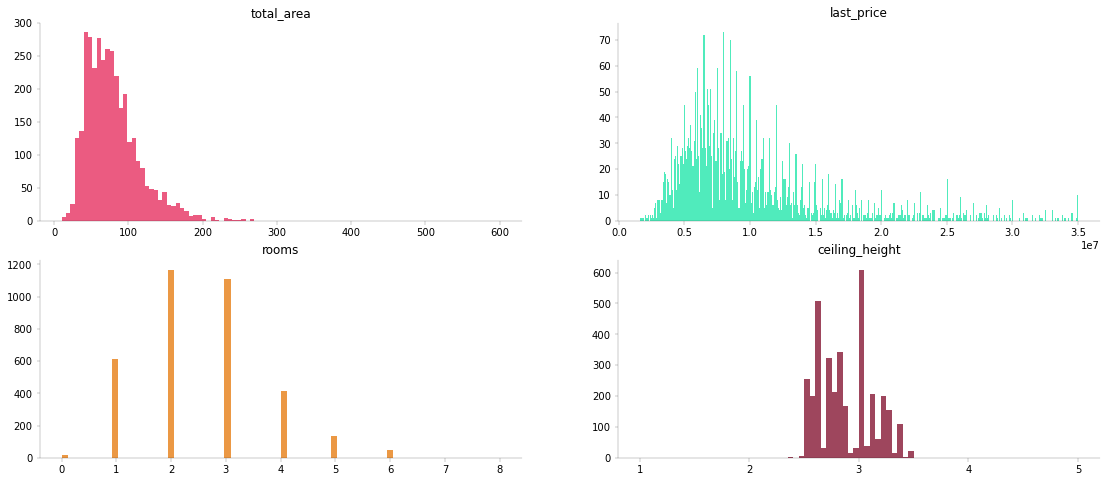

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(19,8))
for x in range(2):
    for y in range(2):
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.2)
        ax[x][y].yaxis.set_tick_params(width=0.2)
        for axis in ['top','bottom','left','right']:
            ax[x][y].spines[axis].set_linewidth(0.2)

ax[0][0].hist(df_spb_center.total_area, bins=100, range=(10,600), color='#EB5B81')
ax[0][0].set_title('total_area')

ax[0][1].hist(df_spb_center.last_price, bins=400, color='#50EBBC')
ax[0][1].set_title('last_price')

ax[1][0].hist(df_spb_center.rooms, bins=70, range=(0,8), color='#EB9844') 
ax[1][0].set_title('rooms')

ax[1][1].hist(df_spb_center.ceiling_height, bins=80, range=(1,5), color='#9E465D') 
ax[1][1].set_title('ceiling_height')

plt.show()

We can see outliers but this histograms closer to normal distribution than previously

                      last_price  total_area  rooms  floor_group  \
last_price                  1.00        0.74   0.46         0.09   
total_area                  0.74        1.00   0.78         0.11   
rooms                       0.46        0.78   1.00         0.08   
floor_group                 0.09        0.11   0.08         1.00   
city_centers_nearest       -0.09       -0.17  -0.22        -0.03   

                      city_centers_nearest  
last_price                           -0.09  
total_area                           -0.17  
rooms                                -0.22  
floor_group                          -0.03  
city_centers_nearest                  1.00  


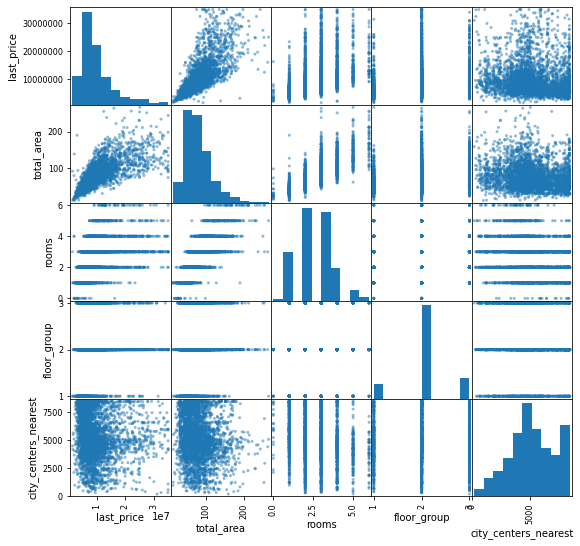

In [55]:
df_stat_multi_3 = df_spb_center[['last_price', 'total_area',  'rooms', 'floor_group', 'city_centers_nearest']]
print(df_stat_multi_3.corr())
pd.plotting.scatter_matrix(df_stat_multi_3, figsize=(9,9))
plt.show()

In [56]:
df_stat_multi_4 = df_spb_center[['last_price', 'first_exposition_month', 'first_exposition_day_of_week', 'first_exposition_year']]
print(df_stat_multi_4.corr())

                              last_price  first_exposition_month  \
last_price                          1.00                   -0.02   
first_exposition_month             -0.02                    1.00   
first_exposition_day_of_week       -0.02                    0.04   
first_exposition_year              -0.02                   -0.25   

                              first_exposition_day_of_week  \
last_price                                           -0.02   
first_exposition_month                                0.04   
first_exposition_day_of_week                          1.00   
first_exposition_year                                 0.01   

                              first_exposition_year  
last_price                                    -0.02  
first_exposition_month                        -0.25  
first_exposition_day_of_week                   0.01  
first_exposition_year                          1.00  


<a id="summary_spb_center"></a>
### Summary
As throughout the database, in St. Petersburg in the center, the price depends on the total area (`0.74` - high) and on the number of rooms (`0.46` - moderate), but it does not affect how close to the center (`-0.09`)

The price in the center of St. Petersburg does not depend on the date of ad placement

<a id="conclusion"></a>
## Conclusion

Our task was to set the parameters that would allow us to build an automated system. During the analysis, we came to the conclusion that the cost of an apartment in St. Petersburg and the surrounding areas is most affected by the total area of the object, the number of rooms in it and the distance from the center. 

The area of the conditional "center" was determined, where the cost of objects lies within certain limits and these boundaries are clearly visible if we compare the costs of "central" and "non-central" apartments. Thus, if we consider a newly published ad for the sale of an apartment, and at the same time the distance from the center is indicated for this ad, we can make some assumptions about how much the apartment will eventually be sold for.

On average, apartments are sold in 95 days. This data can be used, for example, as a means of reminding the user that it is probably worth updating the description of the ad or, for example, changing the cost of the apartment.

The correlation between the date of submission of the ad and the final cost of the sale has not been found.